# Exploring and Visualizing data


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


#### Libraries


In [2]:
# Create an environment with Python >=3.7 & <=3.11 for library compatibility
# conda create -n basicMachineLearning python=3.7
# conda install -n basicMachineLearning ipykernel --update-deps --force-reinstall

# Libraries required.
# pip install pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 
# scikit-learn==0.20.1 requests beautifulsoup4 ipython-sql sqlalchemy==1.3.9

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io

Reading the SpaceX dataset into a Pandas dataframe and printing a summary


In [4]:

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = requests.get(URL)
text = io.StringIO(resp.text)

df = pd.read_csv(text)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [5]:
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


### `FlightNumber` vs `Payload`



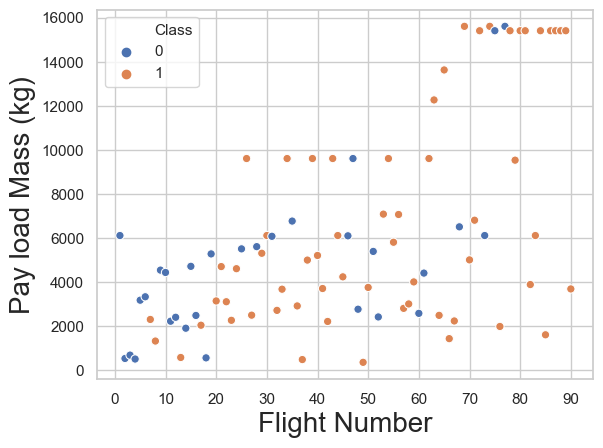

In [6]:

sns.set()
sns.set_style("whitegrid")
ax = sns.scatterplot(x="FlightNumber", 
                     y="PayloadMass", 
                     hue="Class", 
                     data=df, 
                     legend='full')
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.legend(loc='upper left')
# Set the tick locations and labels, can also use np array here
ax.set_xticks(np.arange(0,len(df)+1,10))
ax.set_xticklabels(np.arange(0,len(df)+1,10))
plt.show(ax)


As the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems like the more massive the payload, the less likely it is that the first stage will return.

### `FlightNumber` vs `LaunchSite`

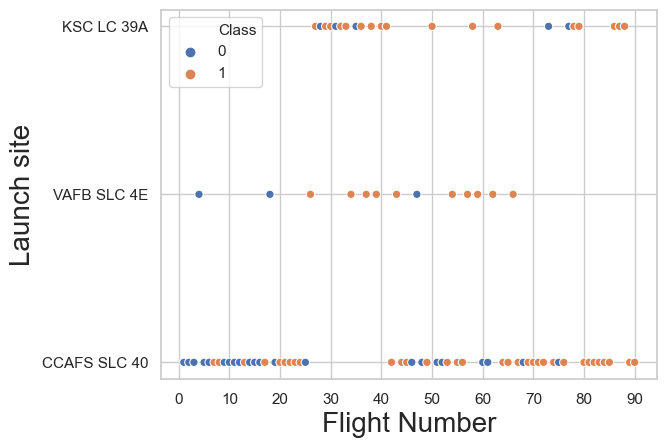

In [7]:
sns.set()
sns.set_style("whitegrid")
ax = sns.scatterplot(x="FlightNumber",
                     y="LaunchSite", 
                     hue="Class", 
                     data=df, 
                     legend='full')
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch site",fontsize=20)
plt.legend(loc='upper left')
# Set the tick locations and labels, can also use np array here
ax.set_xticks(np.arange(0,len(df)+1,10))
ax.set_xticklabels(np.arange(0,len(df)+1,10))
plt.show(ax)


It looks like the success rate increased with the number of flights in each site.


### `PayloadMass` vs `LaunchSite`

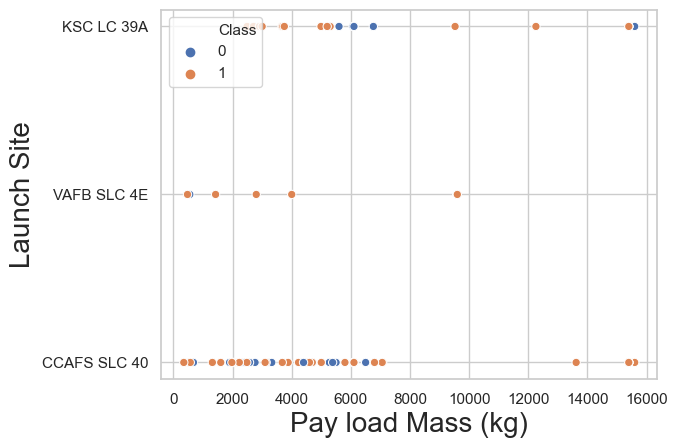

In [8]:
sns.set()
sns.set_style("whitegrid")
ax = sns.scatterplot(x="PayloadMass", 
                     y="LaunchSite", 
                     hue="Class", 
                     data=df, 
                     legend='full')
plt.xlabel("Pay load Mass (kg)",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.legend(loc='upper left')
plt.show(ax)

In the Payload Vs. Launch Site scatter point chart, the VAFB-SLC launchsite has no rockets launched with a mass greater than 10000 kg.


### success rate vs `Orbit` type

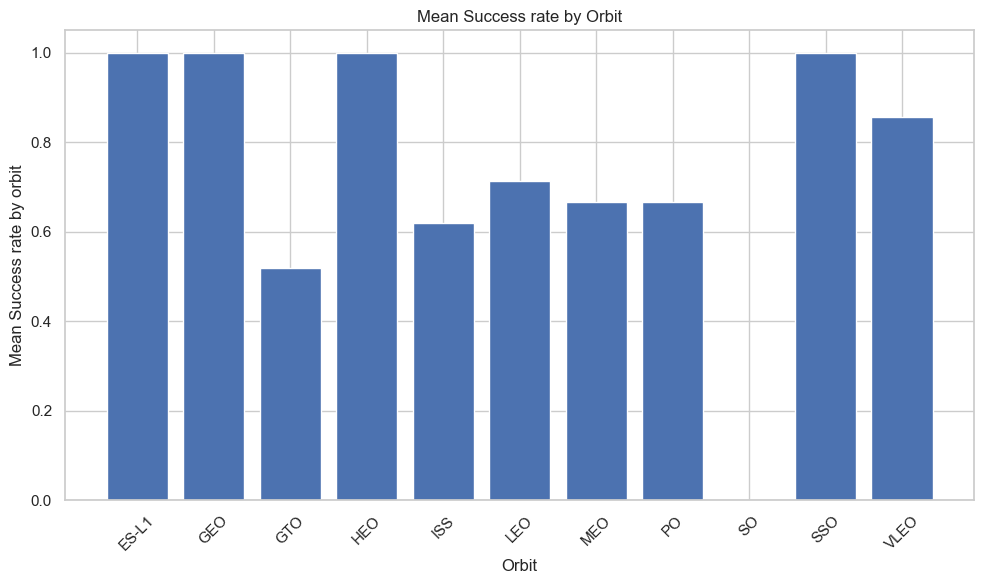

In [9]:
grouped_data = df.groupby('Orbit')['Class'].mean().reset_index()

# bar plot
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['Orbit'], grouped_data['Class'])
plt.xlabel('Orbit')
plt.ylabel('Mean Success rate by orbit')
plt.title('Mean Success rate by Orbit')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

From looking at the bar chart it looks like launching to the orbit `SO` was not successful, followed by a 50% chance of success when launching to orbig `GTO` and over 60% to orbits `ISS`, `LEO`, `MEO` and `PO`. The orbit `VLEO` had a success rate of over 80% and the rest of the orbits were always successful.


### `FlightNumber` vs `Orbit` type.


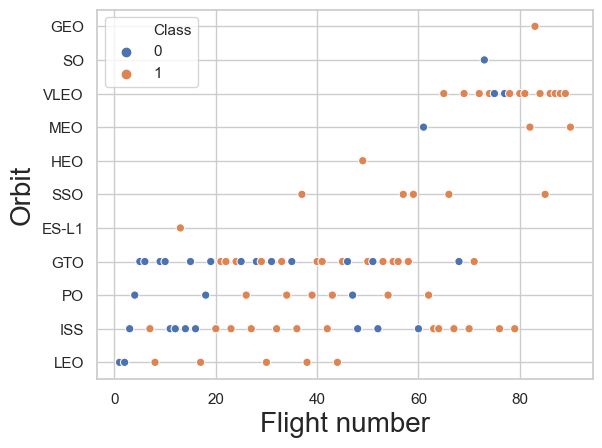

In [10]:
sns.set()
sns.set_style("whitegrid")
ax = sns.scatterplot(x="FlightNumber", 
                     y="Orbit", 
                     hue="Class", 
                     data=df, 
                     legend='full')
plt.xlabel("Flight number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.legend(loc='upper left')
plt.show(ax)

The `LEO` orbit's success seems to be related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


### `PayloadMass` vs `Orvit` type

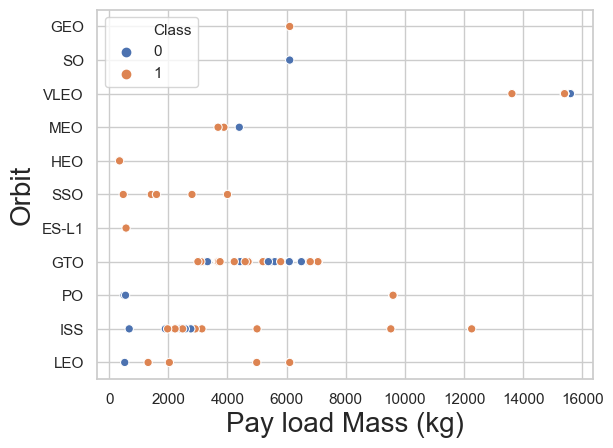

In [22]:
sns.set()
sns.set_style("whitegrid")
ax = sns.scatterplot(x="PayloadMass", 
                     y="Orbit", 
                     hue="Class", 
                     data=df, 
                     legend='full')
plt.xlabel("Pay load Mass (kg)",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.legend(loc='upper left')
plt.show(ax)

Successful landings seem associated with the orbits `Polar` , `LEO` and `ISS`. However the GTO orbit has an ambiguous mix of successful and failed landings.


### `Year` vs success rate

In [14]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()
    

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


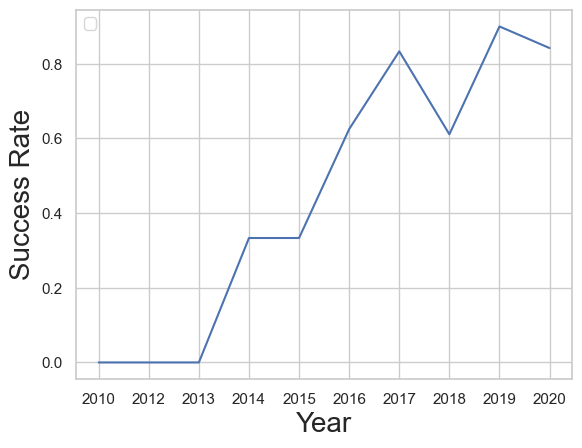

In [33]:
grouped_year_success = df.groupby('Date')['Class'].mean().reset_index()
year = df['Date']

sns.set()
sns.set_style("whitegrid")
ax = sns.lineplot(x=grouped_year_success['Date'], 
                  y=grouped_year_success['Class'])
plt.xlabel("Year",fontsize=20)
plt.ylabel("Success Rate",fontsize=20)
plt.legend(loc='upper left')
plt.show(ax)

It looks like the sucess rate since 2013 kept increasing.


## Feature Engineering


Selecting the features that will be used to train a model to predict the success of a landing attempt.


In [17]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


Using the function <code>get_dummies</code> for one-hot-encoding and casting all numeric columns to `float`. 

In [40]:
features_one_hot = pd.get_dummies(features).astype(float)
features_one_hot.shape

(90, 80)